# 1<sup>η</sup> Εργαστηριακή Άσκηση
## Ανάλυση & Μελέτη Σύνθετων Τοπολογιών Δικτύου

<p style='text-align: justify;'> Στην παρούσα άσκηση θα δημιουργηθούν και θα αναλυθούν τοπολογίες, ορισμένες από τις οποίες χρησιμοποιούνται για την αναπαράσταση σύνθετων ή/και κοινωνικών δικτύων. Η ανάλυση θα γίνει μέσω των μετρικών ανάλυσης που παρουσιάστηκαν στις διαλέξεις του μαθήματος. Τα δίκτυα που θα μελετηθούν δίνονται στον Πίνακα 1.</p>

<table width="80%">
    <caption>Πίνακας $1$: Σύνθετα δίκτυα και χαρακτηριστικές παράμετροι</caption>
    <thead>
    <tr>
        <th>Τύπος Δικτύου</th>
        <th>Μοντέλο</th>
        <th>Αναγνωριστικό</th>
        <th>Παράμετροι</th>
    </tr>
    </thead>
    <tbody>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Πλέγμα</td>
            <td style="background-color:#F2F4F7" rowspan="2">Πεπερασμένο</td>
            <td style="background-color:#F2F4F7" rowspan="2">REG</td>
            <td style="background-color:#F2F4F7">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Bαθμός $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="2">Τυχαίος γραφος</td>
            <td style="background-color:#FFFFFF" rowspan="2">Erdos-Renyi</td>
            <td style="background-color:#FFFFFF" rowspan="2">RG (ER)</td>
            <td style="background-color:#FFFFFF">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Συνδέσεις $M$</td>
        </tr>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Τυχαίος γράφος</td>
            <td style="background-color:#F2F4F7" rowspan="2">Gilbert</td>
            <td style="background-color:#F2F4F7" rowspan="2">RG (G)</td>
            <td style="background-color:#F2F4F7">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Πιθανότητα σύνδεσης $p$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="3">Τυχαίος γεωμετρικός γράφος</td>
            <td style="background-color:#FFFFFF" rowspan="3">Επίπεδος</td>
            <td style="background-color:#FFFFFF" rowspan="3">RGG</td> 
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" >Ακτίνα $R$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Κόμβοι $n$</td>  
        </tr>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Scale-free</td>
            <td style="background-color:#F2F4F7" rowspan="2">Barabasi-Albert</td>
            <td style="background-color:#F2F4F7" rowspan="2">SF (BA)</td>
            <td style="background-color:#F2F4F7">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Παράμετρος επισύναψης $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="3">Small-world</td>
            <td style="background-color:#FFFFFF" rowspan="3">Watts-Strogatz</td>
            <td style="background-color:#FFFFFF" rowspan="3">SW (WS)</td>
            <td style="background-color:#FFFFFF">Κόμβοι $n$ </td>   
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" >Βαθμός αρχικού πλέγματος $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Πιθανότητα ανασύνδεσης $g_p$</td>  
        </tr>
    </tbody>
</table>

In [1]:
seedno=600    #seed number !DO NOT CHANGE IT!

In [2]:
%matplotlib inline 
# With the above backend, the output of plotting commands is displayed inline within frontends 
# like the Jupyter notebook, directly below the code cell that produced it. The resulting 
# plots will then also be stored in the notebook document.
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

## Α. Κατασκευή και οπτικοποίηση σύνθετων τύπων δικτύου

### Τοπολογία REG για βαθμό πλέγματος $d = 4$

In [3]:
node_styling = {
    "node_color": "midnightblue",
    "edge_color": "blue",
    "node_size": 200
}

In [4]:
def draw_circular_graph(G: nx.Graph, node_styling: dict = node_styling):
    fig, ax = plt.subplots(figsize=(7,7))
    nx.draw_circular(G, **node_styling, ax=ax)
    ax.axis("equal")
    plt.show()

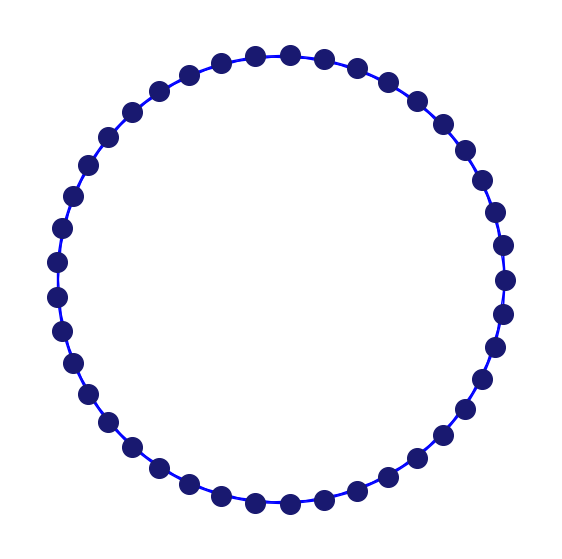

In [5]:
random.seed(seedno) # initialize the random number generator.
#n=4x μέγεθος δικτύου: αντικαταστήστε το x με το τελευταίο ψηφίο του αριθμού μητρώου σας. ΑΜ. 03400131
n=41
d=4  # degree of each node in grid
# για την κατασκευή του REG χρησιμοποιήστε την watts_strogatz_graph από το networkx. 
# Επιλέξτε προσεκτικά την τιμή της παραμέτρου p. 
REG = nx.watts_strogatz_graph(n, d, p=0)  # probability of replacing ring nodes is zero
REG.graph['name'] = 'REG' # save the graph's name as an attribute

#οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx
draw_circular_graph(REG)

### Τοπολογία RG (ER) για αριθμό συνδέσεων $M = 150$

Erdős–Rényi (ER) random graph model.

$G(n, M)$ graph is chosen uniformly at random from the collection of all graphs which have $n$ nodes and $M$ edges. The nodes are considered to be labeled, meaning that graphs obtained from each other by permuting the vertices are considered to be distinct. For example, in the $G(3,2)$ model, there are three two-edge graphs on three labeled vertices (one for each choice of the middle vertex in a two-edge path), and each of these three graphs is included with probability $\frac{1}{3}$.

Another random graph model was proposed by Edgar Gilbert, denoted $G(n,p)$, in which every possible edge occurs independently with probability $0 < p < 1$.  The probability of obtaining any one particular random graph with m edges is $p^{m}(1-p)^{N-m}$ with the notation $N=\tbinom{n}{2}$.

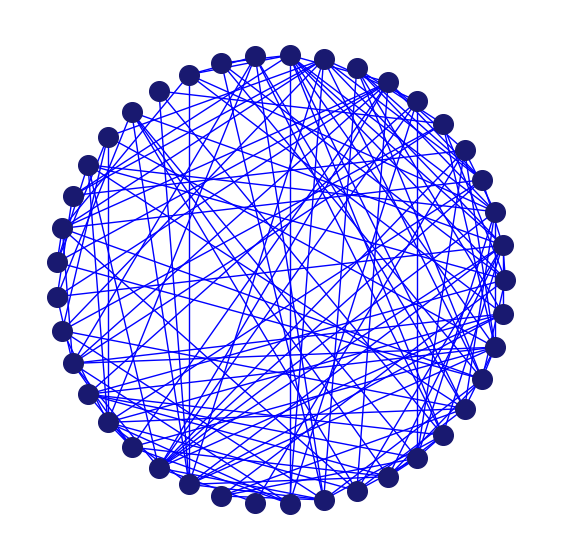

In [6]:
random.seed(seedno)
n = 41 
M = 150

# για την κατασκευή του RGER χρησιμοποιήστε την gnm_random_graph από το networkx
RGER = nx.gnm_random_graph(n, M)
RGER.graph['name'] = 'RGER' # save the graph's name as an attribute

# οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx
draw_circular_graph(RGER)

### Τοπολογία RGG  με ακτίνα σύνδεσης $R=0.35$

The random geometric graph model places $n$ nodes uniformly at random in the unit cube. Two nodes are joined by an edge if the distance between the nodes is at most radius $R$.

In [7]:
random.seed(seedno)
n=41
R=0.35

# για την κατασκευή του RGG χρησιμοποιήστε την random_geometric_graph από το networkx
RGG = nx.random_geometric_graph(n, R)
RGG.graph['name'] = 'RGG' # save the graph's name as an attribute


#οπτικοποίηση: https://networkx.org/documentation/stable/auto_examples/drawing/plot_random_geometric_graph.html

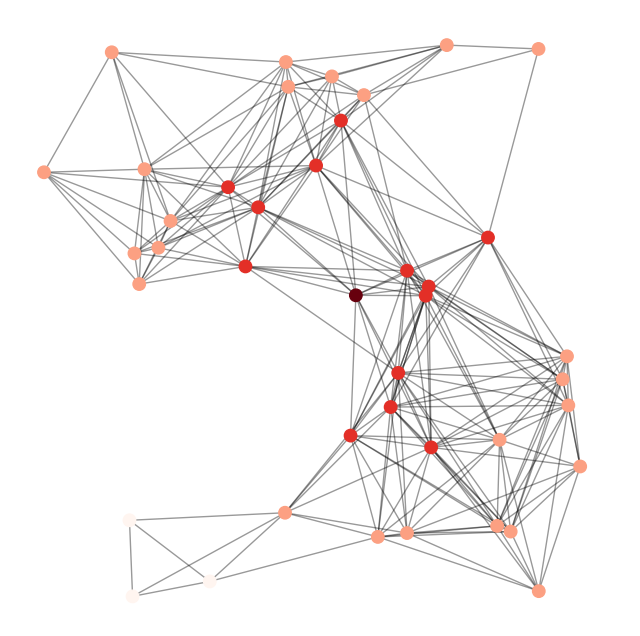

In [8]:
pos = nx.get_node_attributes(RGG, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(RGG, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(RGG, pos, alpha=0.4)
nx.draw_networkx_nodes(
    RGG,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

### Τοπολογία SF με παράμετρο επισύναψης $d=4$

Returns a random graph using Barabási–Albert preferential attachment.

A graph of $n$ nodes is grown by attaching new nodes each with $d$ edges that are preferentially attached to existing nodes with high degree.

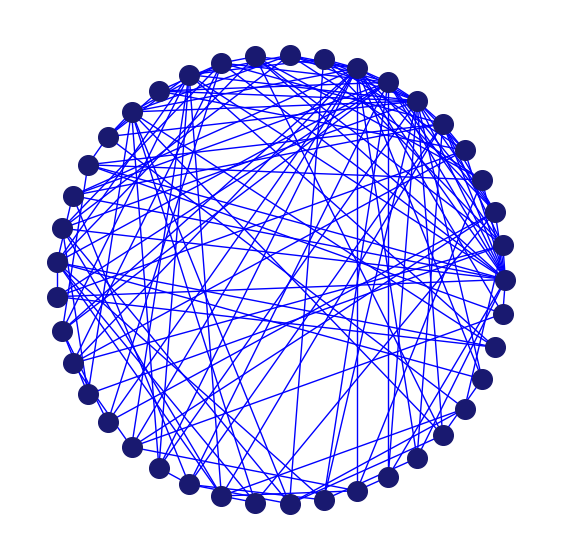

In [9]:
random.seed(seedno)
n=41
d=4

# για την κατασκευή του SF χρησιμοποιήστε την barabasi_albert_graph από το networkx
SF = nx.barabasi_albert_graph(n, d) 
SF.graph['name'] = 'SF' # save the graph's name as an attribute

#οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx
draw_circular_graph(SF)

### Τοπολογία SW με βαθμό αρχικού πλέγματος $d=4$ και πιθανότητα ανασύνδεσης $p=0.25$

First create a ring over $n$ nodes. Then each node in the ring is joined to its $d$ nearest neighbors (or $d-1$ neighbors if $d$ is odd). Then shortcuts are created by replacing some edges as follows: for each edge $(u,v)$ in the underlying "$n$-ring with $d$-nearest neighbors" with probability $p$ replace it with a new edge $(u,w)$ with uniformly random choice of existing node $w$.

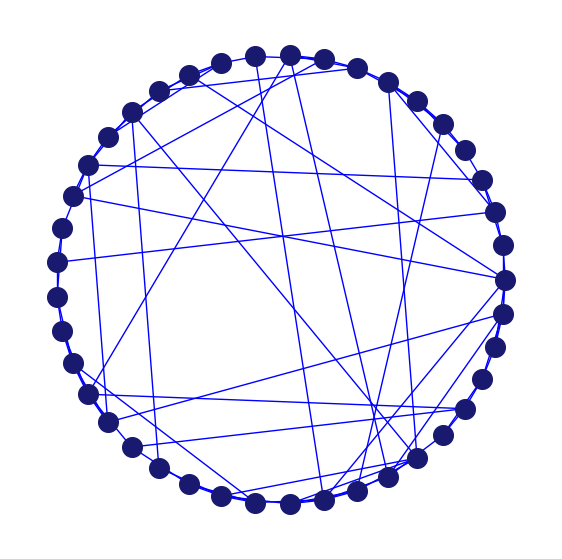

In [10]:
random.seed(seedno)
n = 41
d = 4
p = 0.25

# για την κατασκευή του SW χρησιμοποιήστε την watts_strogatz_graph από το networkx. 
SW = nx.watts_strogatz_graph(n, d, p) 
SW.graph['name'] = 'SW' # save the graph's name as an attribute

#οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx
draw_circular_graph(SW)

## B. Μετρικές δικτύου

### B1. Συντελεστής ομαδοποίησης (Clustering coefficient)

#### Για κάθε μια από τις τοπολογίες REG, RG(ER), RGG, SF(BA) και SW(WS):
#### Β1.1 Να υπολογιστεί ο συντελεστής ομαδοποίησης κάθε κόμβου και να αναπαρασταθεί η κατανομή του.
#### Β1.2  Να υπολογιστεί ο μέσος συντελεστής ομαδοποίησης και η διασπορά του.
#### Β.1.3 Να βρεθούν οι κόμβοι με το μικρότερο και το μεγαλύτερο συντελεστή ομαδοποίησης. 
#### Να σχολιαστούν τα αποτελέσματα.

The clustering coefficient (cc) quantifies the grouping of a network. It essentially shows how well a node is connected to its neighorhood.

In [11]:
def cc(G: nx.Graph, n_bins='auto', verbose=True, hist=True, shared_hist=False):
    """
    Default mode is verbose=True, hist=True that prints information on the clustering coefficients of the graph
    and also returns them along with a histogram.
    The 2nd mode is the shared_hist=True where nothing is returned and a common histogram plot can be created.
    """
    G_name: str = G.graph['name'] # name attribute of the nx.Graph object
    local_cc: dict = nx.clustering(G) # calculate local clustering coefficients for all graph nodes
    n = nx.number_of_nodes(G) # nodes number

    # histogram of node (local) clustering coefficients
    cc_dist: np.ndarray = np.array(list(local_cc.values()))

    # mean cc and variance
    mean_cc: float = np.mean(cc_dist)
    variance_cc: float = np.var(cc_dist)

    # nodes with min and max cc
    max_cc: float = np.max(cc_dist) # maximum cc value
    max_cc_index: int = np.argmax(cc_dist)  # index of node with maximum cc value

    min_cc: float = np.min(cc_dist)
    min_cc_index: int = np.argmin(cc_dist) 

    # prints
    if verbose:
        print(f"Graph: {G_name}")  # show name of graph
        print(f"Clustering coefficient: mean = {mean_cc:.3f}, variance = {variance_cc:.3f}")
        print(f"Maximum clustering coefficient node index = {max_cc_index}, value = {max_cc:.3f}")
        print(f"Minimum clustering coefficient node index = {min_cc_index}, value = {min_cc:.3f}")

    if hist:
        plt.hist(cc_dist, bins=n_bins, label=G_name, alpha=0.8) # histogram of local node cc. Binning strategy 'auto' is the max of 'sturges' and 'fd' estimators providing good all around performance.
        plt.title(f"Local clustering coefficients' histogram")
        plt.xlabel("Clustering coefficient value")
        plt.ylabel("Number of nodes (absolute frequency)")
    
    if not shared_hist: # if in shared hist mode just create the shared histogram and don't return something
        plt.title(f"{G_name} local clustering coefficients' histogram")

        return hist, cc_dist, mean_cc, variance_cc, max_cc, max_cc_index, min_cc, min_cc_index

Graph: REG
Clustering coefficient: mean = 0.500, variance = 0.000
Maximum clustering coefficient node index = 0, value = 0.500
Minimum clustering coefficient node index = 0, value = 0.500


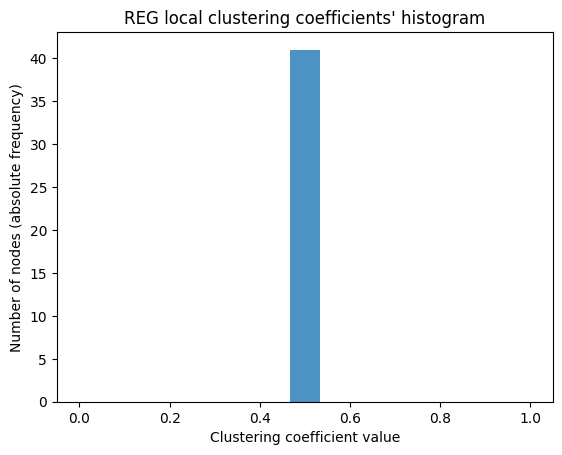

Graph: RGER
Clustering coefficient: mean = 0.206, variance = 0.026
Maximum clustering coefficient node index = 30, value = 1.000
Minimum clustering coefficient node index = 14, value = 0.000


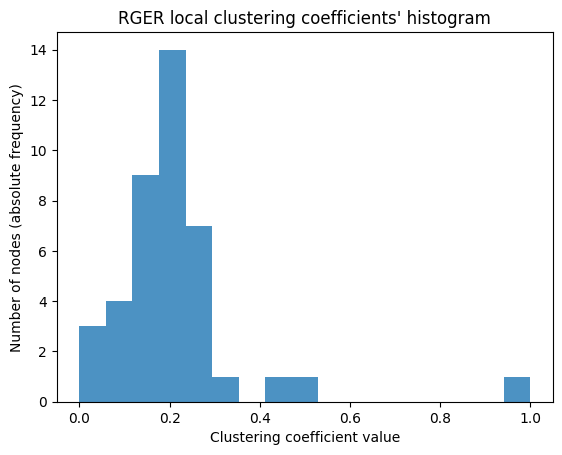

Graph: RGG
Clustering coefficient: mean = 0.722, variance = 0.017
Maximum clustering coefficient node index = 7, value = 1.000
Minimum clustering coefficient node index = 28, value = 0.528


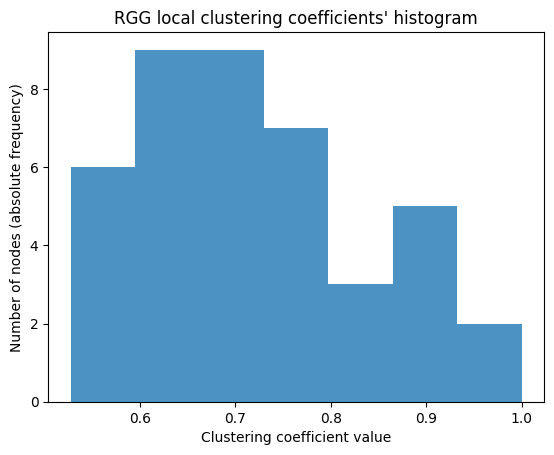

Graph: SF
Clustering coefficient: mean = 0.233, variance = 0.015
Maximum clustering coefficient node index = 34, value = 0.500
Minimum clustering coefficient node index = 24, value = 0.000


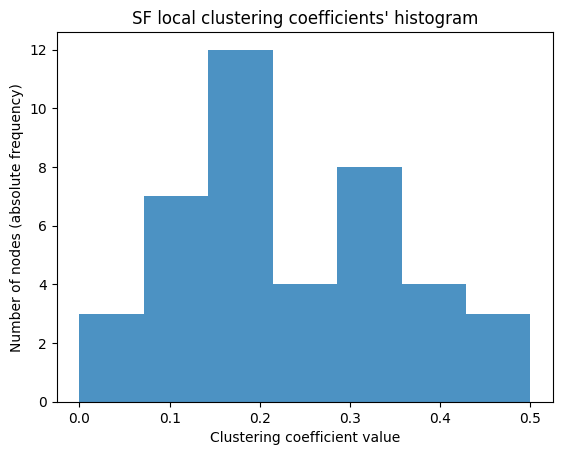

Graph: SW
Clustering coefficient: mean = 0.241, variance = 0.027
Maximum clustering coefficient node index = 22, value = 0.667
Minimum clustering coefficient node index = 11, value = 0.000


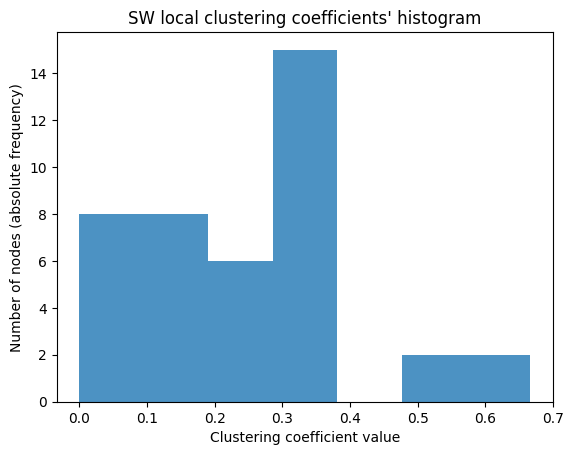

In [12]:
graphs: tuple[nx.Graph] = (REG, RGER, RGG, SF, SW)
graphs_names: list[str] = (G.graph['name'] for G in graphs)

for graph in graphs:
    plt.figure()
    if graph == REG:
        histogram_plot, *_ = cc(graph, n_bins=15) # for the REG graph use 15 bins instead of automatically defining them, otherwise a single bin is used by the 'auto' option set as default value in the function
    else:
        histogram_plot, *_  = cc(graph)
    plt.show()

Create a shared axes histogram showing all clustering coefficient distributions together.

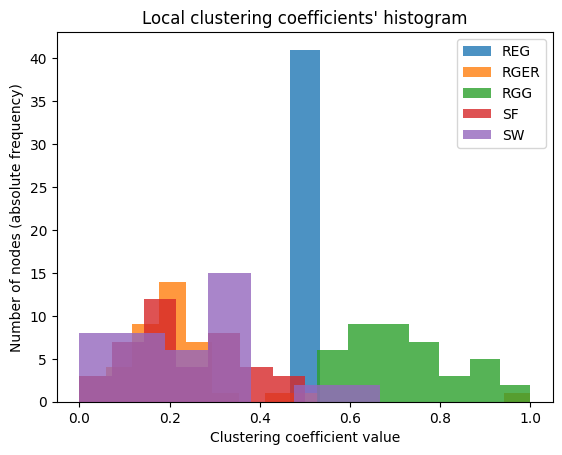

In [13]:
graphs: tuple[nx.Graph] = (REG, RGER, RGG, SF, SW)
graphs_names: list[str] = (G.graph['name'] for G in graphs)

for graph in graphs:
    if graph == REG:
        cc(graph, n_bins=15, verbose=False, shared_hist=True) # for the REG graph use 15 bins instead of automatically defining them, otherwise a single bin is used by the 'auto' option set as default value in the function
    else:
        cc(graph, verbose=False, shared_hist=True)
plt.legend()

Clustering coefficient distribution values for the different type of graphs:

| Graph                                               | Mean    | Variance |  Max    | Min    |
|-----------------------------------------------------|---------|----------|---------|--------|
| REG - Ring grid graph                               | 0.5     |  $\color{red}{0}$      |  0.5    | 0.5    |
| RGER - Erdős–Rényi (ER) random graph model          | $\color{red}{0.206}$   |  0.026   |  1    | 0      |
| RGG - Random geometric graph                        | $\color{green}{0.722}$   |  0.017   |  1     | 0.528  |
| SF - Scale free                                     | 0.233   |  0.015   |  0.5   | 0      |
| SW - Small world                                    | 0.241   |  $\color{green}{0.027}$   |  0.667  | 0      |

We can see from the above table and joint histogram distributions plot that the selected RGG graph presents the largest clustering coefficient mean value whereas RGER has the lowest mean. This could be interpreted as RGG being the graph with its nodes having the best connectivity with their neighborhood and RGER nodes having the worst one. RGER has a single node with a clustering coefficient of 1, however, the rest of its nodes have low clustering coefficients centered around the value of 0.206, which is its distribution's mean value. 

REG has a constant clustering coefficient equal to 0.5 for every node out of the 41 nodes in the graph since each node is connected with $d=4$ nodes and the 4 neighbors are connected with each other with three edges in total hence the local clustering coefficient for a node $u_i$ is $C_i = \frac{2|e_{jk}|}{d_i(d_i-1)} = \frac{2*3}{4*3} = 0.5, u_i,u_j \in N_i, e_{jk} \in E \text{ for a graph } G(V,E)$.

The Scale Free (SF) network has a maximum clustering coefficient of 0.5 with a relatively low mean and low variance at the same time. This is indicative of the fact that such networks are not creating strongly connected neighborhoods of nodes. 

The Small World (SW) network presents the highest variance of all the graphs spanning over a wide range of clustering coefficient values for its nodes, with just a few of its nodes having more than 0.5 clustering coefficient. 

### Β2. Μέσο μήκος μονοπατιού - Διάμετρος - Ακτίνα γράφου

#### Για κάθε μια από τις τοπολογίες REG, RG(ER), RGG, SF(BA) και SW(WS):
#### Β2.1 Nα υπολογιστεί το μέσο μήκος μονοπατιού και η διασπορά του. Προτείνεται η χρήση της συνάρτησης  all_pairs_shortest_path_length του networkx.
#### B2.2 Να υπολογιστεί η διάμετρος (συνάρτηση diameter) και η ακτίνα (συνάρτηση radius).
#### Για τα παραπάνω πραγματοποιήστε συγκρίσεις και εξηγήστε με βάση τα χαρακτηριστικά της κάθε τοπολογίας όπως παρουσιάζονται στη θεωρία.

First, we define the average path length for an unweighted graph $G$.
We assume the set of vertices $V$. Let $d(u_1, u_2)$ where $u_1, u_2 \in V$ denote the shortest distance between nodes $u_1$ and $u_2$. If node $u_2$ cannot be reached from node $u_1$ then we define $d(u_1, u_2)=0$. Then, we calculate the average path length of the graph $l_G$ as:

$ l_G = \frac{1}{\binom{n}{2}} \cdot \displaystyle\sum_{i \neq j}d(u_i, u_j) = \frac{2}{n(n-1)} \cdot \displaystyle\sum_{i \neq j}d(u_i, u_j)$, where n is the number of nodes/vertices in $G$. 

Next, we assume that the requested variance refers to the difference of the nodes' average shortest path lengths from the graph's overall average shortest path length. Then it follows that:

$Var(G) = \frac{1}{n-1} \cdot \displaystyle\sum_{i=0}^{i=n-1}(l_{u_i}-l_G)^2$, where there are $n$ nodes that are labeled from $0$ to $n-1$ and:

$l_{u_i} = \frac{1}{n-1} \cdot \displaystyle\sum_{j \neq i} d(u_i, u_j)$, is the average shortest path length for node $u_i$. Please note that for the calculation, only the rest of the $n-1$ nodes are considered, hence the denominator $n-1$.

In [14]:
def compute_path_lengths(G):
    G_name: str = G.graph['name'] # name attribute of the nx.Graph object
    n = nx.number_of_nodes(G) # nodes number

    shortest_paths_dict: dict = dict(nx.all_pairs_shortest_path_length(G))
    

    # average path length calculation
    path_lengths: list = []
    for start_node in range(0, n):
        paths_dict: dict = shortest_paths_dict[start_node]
        for end_node in range(start_node+1, n):  # with this nested loop we will only consider each pair of nodes u_i, u_j once and also make sure that u_i != u_j
            shortest_path: int = paths_dict[end_node]
            path_lengths.append(shortest_path)
    
    np_path_lengths: np.ndarray = np.array(path_lengths)
    np_path_lengths_mean = np.mean(np_path_lengths)
    
    # variance calculation
    # first we calculate for each node its average path length to any other node on the graph 
    node_avg_path_length: list = []

    for start_node in range(0, n):
        end_node = 0
        node_shortest_paths = []
        paths_dict: dict = shortest_paths_dict[start_node]
        while end_node < n:  # scan all other nodes and get the path length
            if start_node == end_node:
                end_node += 1
                continue  # do not take into account
            shortest_path: int = paths_dict[end_node]
            node_shortest_paths.append(shortest_path)
            end_node += 1

        np_node_shortest_paths = np.array(node_shortest_paths)
        node_avg_path_length.append(np.mean(np_node_shortest_paths))

    # then we can calculate the variance
    node_avg_path_length = np.array(node_avg_path_length)
    variance = np.sum((node_avg_path_length - np_path_lengths_mean)**2) / (n-1)

    # diameter and radius of Graph
    diameter:int = nx.diameter(G)
    radius:int = nx.radius(G)

    # save diameter and radius as graph attributes
    G.graph["diameter"] = diameter
    G.graph["radius"] = radius

    # prints
    print(f"Graph: {G_name}")  # show name of graph
    print(f"Average path length = {np_path_lengths_mean:.3f}, variance = {variance:.3f}")
    print(f"Diameter = {diameter}, radius = {radius}")
    print("----------------------------------------------------")

In [15]:
for graph in graphs:
    compute_path_lengths(graph)

Graph: REG
Average path length = 5.500, variance = 0.000
Diameter = 10, radius = 10
----------------------------------------------------
Graph: RGER
Average path length = 2.020, variance = 0.037
Diameter = 4, radius = 3
----------------------------------------------------
Graph: RGG
Average path length = 2.250, variance = 0.173
Diameter = 5, radius = 3
----------------------------------------------------
Graph: SF
Average path length = 1.999, variance = 0.043
Diameter = 4, radius = 2
----------------------------------------------------
Graph: SW
Average path length = 2.898, variance = 0.073
Diameter = 5, radius = 4
----------------------------------------------------


Below we summarize the results in a table:


| Graph                                               | Avg path length    | Variance |  Diameter    | Radius    |
|-----------------------------------------------------|---------|----------|---------|--------|
| REG - Ring grid graph                               | 5.5     |    0    |  10    | 10    |
| RGER - Erdős–Rényi (ER) random graph model          | 2.02   |  0.037   |  4    | 3      |
| RGG - Random geometric graph                        | 2.25   |  0.173   |  5     | 3  |
| SF - Scale free                                     | 1.999   |  0.043   |  4   | 2      |
| SW - Small world                                    | 2.898   |  0.073   |  5  |  4      |

As per the definition given to variance, this is the variance of a node's average path length from the graph's (considering all nodes) average path length.

REG has the longest average path length as it was expected versus all other graph types. The graph is fully symmetrical and each node is pretty much identical to each other and thus variance is zero and radius and diameter are equal since the eccentricity of every node is equal to 10, where:

$\text{ecc}(u_i) = \max_{j}d(u_i, u_j)$, with $u_i, u_j \in V \text{ of graph } G(V,E)$,

$\text{diam(G)} = \max_{u_i} ecc(u_i)$, i.e. the maximum of the nodes' eccentricities.

$\text{rad(G)} = \min_{u_i} ecc(u_i)$, i.e. the minimum of the nodes' eccentricities.

The Scale Free (SF) graph appears to have the lowest radius, meaning that there is at least a node that is very central to the graph from which the maximum geodesic distance (shortest path) to any other node is at most 2 steps. The average path length of the SF graph is also the minimum out of all the graphs considered. As expected this is the graph that seems to be the fastest on average to traverse from any node to another. 
The Random Geogmetric Graph (RGG) and the Small World (SW) graphs have the highest diameters after REG and Small World (SW) the highest radius after REG. Also, SW has a higher average path length compared to RGER, RGG and SF.

#### B.2.3 Για κάθε τοπολογία, ποιος κόμβος συνδέεται με τους περισσότερους κόμβους με μήκος ελάχιστου μονοπατιού ίσο με τη διάμετρο της τοπολογίας?

In [16]:
def find_nodes(G: nx.Graph):
    G_name: str = G.graph['name'] # name attribute of the nx.Graph object
    G_diameter: int = G.graph['diameter']  # diameter of graph
    n = nx.number_of_nodes(G) # nodes number

    shortest_paths_dict: dict = dict(nx.all_pairs_shortest_path_length(G))

    counts: np.array = np.array([])

    for start_node in range(0, n):
        counter = 0
        end_node = 0
        paths_dict: dict = shortest_paths_dict[start_node]
        while end_node < n:  # scan all other nodes and get the path length
            if start_node == end_node:
                end_node += 1
                continue  # do not take into account
            shortest_path: int = paths_dict[end_node]
            if shortest_path == G_diameter:
                counter += 1
            end_node += 1
        counts = np.append(counts, counter)

    
    # print(counts)
    
    # node with max number of other nodes that share a shortest path equal to the graph's diameter 
    nodes_count: int = int(np.max(counts))

    # below we calculate all the indexes of nodes that share the same attribute
    requested_nodes = np.argwhere(counts == np.amax(counts))
    requested_nodes = requested_nodes.flatten().tolist()
    requested_nodes_str: str = ', '.join([str(node_index) for node_index in requested_nodes])

    print(f'Graph: {G_name}')
    print(f"There are {len(requested_nodes)} nodes that have {nodes_count} other nodes in a shortest path length equal to the graph's diameter={G_diameter}. The nodes with this property are the ones with labels: {requested_nodes_str}.")



In [17]:
for graph in graphs:
    find_nodes(graph)
    print('-----------------------------------')

Graph: REG
There are 41 nodes that have 4 other nodes in a shortest path length equal to the graph's diameter=10. The nodes with this property are the ones with labels: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40.
-----------------------------------
Graph: RGER
There are 1 nodes that have 2 other nodes in a shortest path length equal to the graph's diameter=4. The nodes with this property are the ones with labels: 14.
-----------------------------------
Graph: RGG
There are 3 nodes that have 5 other nodes in a shortest path length equal to the graph's diameter=5. The nodes with this property are the ones with labels: 7, 8, 34.
-----------------------------------
Graph: SF
There are 2 nodes that have 1 other nodes in a shortest path length equal to the graph's diameter=4. The nodes with this property are the ones with labels: 25, 37.
-----------------------------------
Graph: SW


In [18]:
# να προσδιοριστεί το label του κόμβου και το σύνολο των κόμβων 
# με τους οποίους συνδέεται με μήκος ελάχιστου μονοπατιού ΄ίσο με τη διάμετρο. 

#### Περιφέρεια του γράφου ορίζεται να είναι το σύνολο των κόμβων του που έχουν εκκεντρότητα ίση με τη διάμετρό του. 
#### Κέντρο του γράφου ορίζεται να είναι το σύνολο των κόμβων του που έχουν εκκεντρότητα ίση με την ακτίνα του.  
#### Β.2.4 Για κάθε τοπολογία, να βρεθεί η περιφέρεια και το κέντρο της και να σχολιαστούν τα αποτελέσματα.

In [19]:
def find_periphery_and_center(G):

    G_name: str = G.graph['name'] # name attribute of the nx.Graph object
    G_diameter: int = G.graph['diameter']  # diameter of graph
    G_radius: int = G.graph['radius']  # radius of graph

    n = nx.number_of_nodes(G) # nodes number

    shortest_paths_dict: dict = dict(nx.all_pairs_shortest_path_length(G))
    G_periphery = []
    G_center = []

    for node in range(0, n):
        paths_dict: dict = shortest_paths_dict[node]
        path_lengths_array: np.array = np.array(list(paths_dict.values()))
        node_eccentricity: int = np.max(path_lengths_array)
        if node_eccentricity == G_diameter:
            G_periphery.append(node)
        if node_eccentricity == G_radius:
            G_center.append(node)
    
    G.graph['periphery'] = G_periphery
    G.graph['radius'] = G_radius

    print(f'Graph: {G_name}')
    periphery_str = ', '.join([str(item) for item in G_periphery])
    center_str = ', '.join([str(item) for item in G_center])

    print(f'Periphery nodes: {periphery_str}')
    print(f'Center nodes: {center_str}')

In [20]:
for graph in graphs:
    find_periphery_and_center(graph)
    print('-----------------------------------')

Graph: REG
Periphery nodes: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40
Center nodes: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40
-----------------------------------
Graph: RGER
Periphery nodes: 14, 20, 30
Center nodes: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40
-----------------------------------
Graph: RGG
Periphery nodes: 1, 5, 7, 8, 19, 34, 36, 39
Center nodes: 4, 6, 12, 15, 16, 21, 25, 31, 35, 40
-----------------------------------
Graph: SF
Periphery nodes: 25, 37
Center nodes: 0, 6, 7, 13, 15
-----------------------------------
Graph: SW
Periphery nodes: 2, 3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16, 19, 20, 22, 26, 27, 28, 35, 36, 37, 38, 39
Center nodes: 0, 1, 7, 8, 9, 1

REG's nodes are identical as stated previously and hence all nodes have the same eccentricity which is equal to both the radius and the diameter that were found to be equal to 10.
RGER graph has a great number of nodes that are in the center of the graph and just 3 of them are in the periphery.
RGG's periphery and center nodes are about the same in number, whereas SF has a relatively small number of nodes in both the center and periphery. Finally, SW has a large number of nodes in the center and periphery as we would expect.

## Γ) Mετρικές κεντρικότητας κόμβων

### Γ1. Κεντρικότητα βαθμού (Degree centrality)
##### Γ1.1 Να αναπαρασταθεί η κατατανομή βαθμών κόμβων για κάθε τοπολογία.
##### Γ1.2 Να υπολογιστεί ο μέσος βαθμός κόμβου καθώς και η διασπορά των βαθμών κόμβου για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

Node degree is the number of neighbors in an undirected graph.

In [21]:
def find_degree(G: nx.Graph, n_bins='auto', verbose=True, hist=True, shared_hist=False):
    """
    Default mode is verbose=True, hist=True that prints information on the clustering coefficients of the graph
    and also returns them along with a histogram.
    The 2nd mode is the shared_hist=True where nothing is returned and a common histogram plot can be created.
    """
    G_name: str = G.graph['name'] # name attribute of the nx.Graph object
    n = nx.number_of_nodes(G) # nodes number

    # histogram of node (local) clustering coefficients
    node_degrees: list = [G.degree(node) for node in range(n)]
    nodes_degrees_np: np.array = np.array(node_degrees)
    avg_degree = np.mean(nodes_degrees_np)
    var_degree = np.var(nodes_degrees_np)

    # prints
    if verbose:
        print(f"Graph: {G_name}")  # show name of graph
        print(f"Average node degree = {avg_degree:.3f}, variance = {var_degree:.3f}")

    if hist:
        plt.hist(node_degrees, bins=n_bins, label=G_name, alpha=0.8) # histogram of local node cc. Binning strategy 'auto' is the max of 'sturges' and 'fd' estimators providing good all around performance.
        plt.title(f"Node degree distribution histogram")
        plt.xlabel("Node degree")
        plt.ylabel("Number of nodes (absolute frequency)")
    
    if not shared_hist: # if in shared hist mode just create the shared histogram and don't return something
        plt.title(f"{G_name} node degree distribution histogram")
        return hist

Graph: REG
Average node degree = 4.000, variance = 0.000


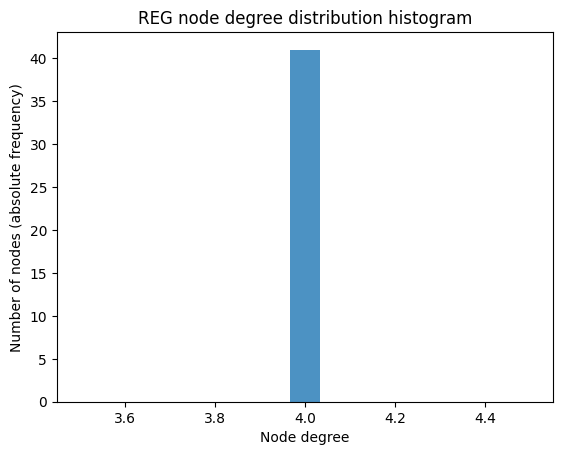

Graph: RGER
Average node degree = 7.317, variance = 5.778


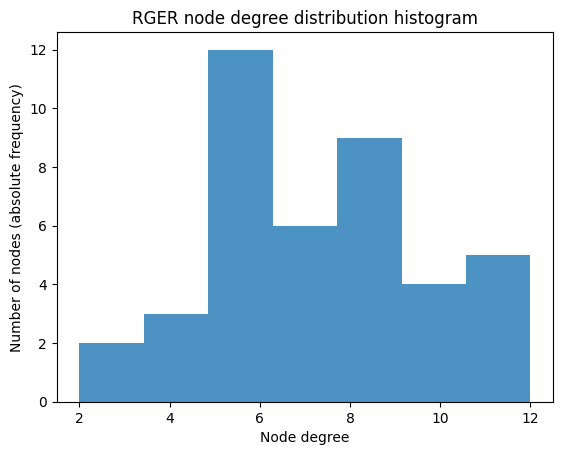

Graph: RGG
Average node degree = 11.512, variance = 17.713


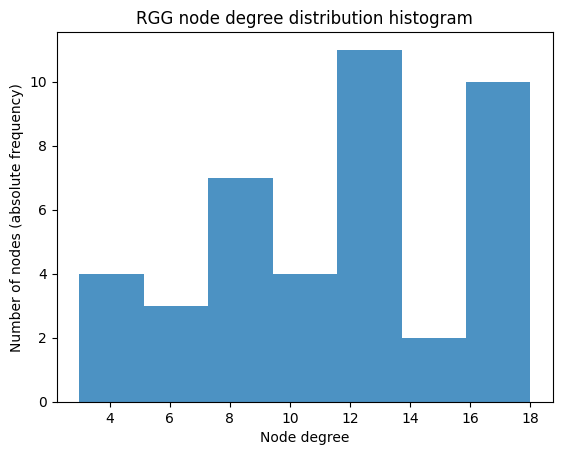

Graph: SF
Average node degree = 7.220, variance = 14.854


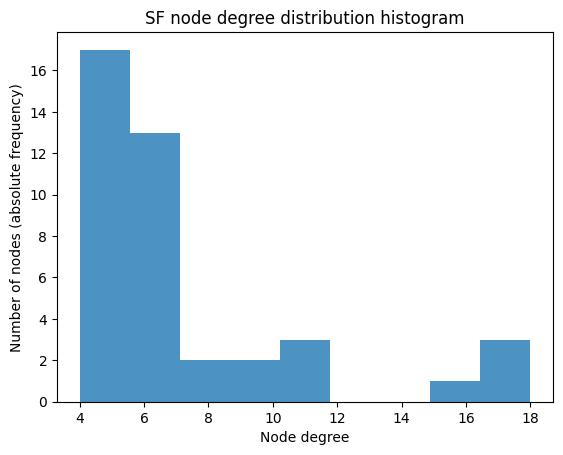

Graph: SW
Average node degree = 4.000, variance = 1.024


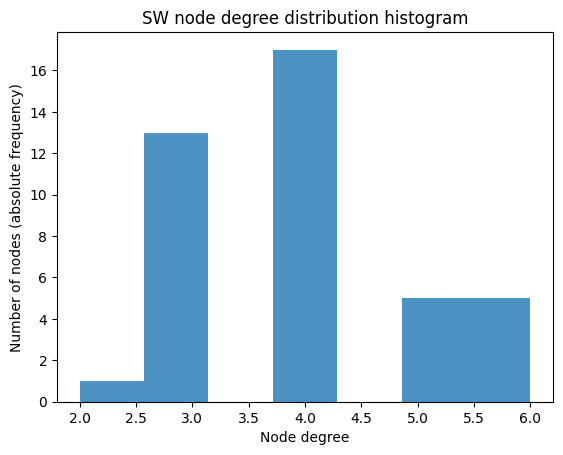

In [22]:
graphs: tuple[nx.Graph] = (REG, RGER, RGG, SF, SW)
graphs_names: list[str] = (G.graph['name'] for G in graphs)

for graph in graphs:
    plt.figure()
    if graph == REG:
        histogram_plot = find_degree(graph, n_bins=15) # for the REG graph use 15 bins instead of automatically defining them, otherwise a single bin is used by the 'auto' option set as default value in the function
    else:
        histogram_plot = find_degree(graph)
    plt.show()

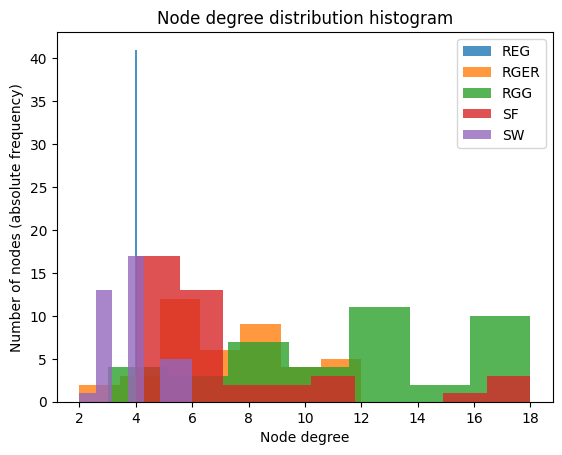

In [23]:
graphs: tuple[nx.Graph] = (REG, RGER, RGG, SF, SW)
graphs_names: list[str] = (G.graph['name'] for G in graphs)

for graph in graphs:
    if graph == REG:
        find_degree(graph, n_bins=15, verbose=False, shared_hist=True) # for the REG graph use 15 bins instead of automatically defining them, otherwise a single bin is used by the 'auto' option set as default value in the function
    else:
        find_degree(graph, verbose=False, shared_hist=True)
plt.legend()

As in the previous histogram, REG graph has all its nodes with the same degree (4) as it was defined originally. The SF graph has a declining outlook that looks like the exponential distribution that was expected.
The RGG graph presents the highest node degree values, however it also has a high variance spanning from node degrees of 3 to 18 for its nodes. The graph could be interpreted as a normal distributio however this is not clear due to the low number of nodes selected. 

### Γ2. Κεντρικότητα εγγύτητας (Closeness centrality)
##### Γ2.1 Να αναπαρασταθεί η κατατανομή της εγγύτητας κόμβων για κάθε τοπολογία.
##### Γ2.2 Να υπολογιστεί η μέση εγγύτητα καθώς και η διασπορά της για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

In [24]:
def find_closeness(G: nx.Graph, n_bins='auto', verbose=True, hist=True, shared_hist=False):
    """
    Default mode is verbose=True, hist=True that prints information on the closeness centrality of the graph
    and also returns them along with a histogram.
    The 2nd mode is the shared_hist=True where nothing is returned and a common histogram plot can be created.
    """
    G_name: str = G.graph['name'] # name attribute of the nx.Graph object
    n = nx.number_of_nodes(G) # nodes number

    closeness_dict: dict = nx.closeness_centrality(G)
    closeness: np.array = np.array(list(closeness_dict.values()))

    # histogram of node (local) closeness
    avg_closeness = np.mean(closeness)
    var_closeness = np.var(closeness)

    # prints
    if verbose:
        print(f"Graph: {G_name}")  # show name of graph
        print(f"Average closeness centrality = {avg_closeness:.3f}, variance = {var_closeness:.3f}")

    if hist:
        plt.hist(closeness, bins=n_bins, label=G_name, alpha=0.8) # histogram of local node cc. Binning strategy 'auto' is the max of 'sturges' and 'fd' estimators providing good all around performance.
        plt.title('Node closeness centrality histogram')
        plt.xlabel("Node closeness centrality")
        plt.ylabel("Number of nodes (absolute frequency)")
    
    if not shared_hist: # if in shared hist mode just create the shared histogram and don't return something
        plt.title(f"{G_name} node closeness centrality histogram")
        return hist


Graph: REG
Average closeness centrality = 0.182, variance = 0.000


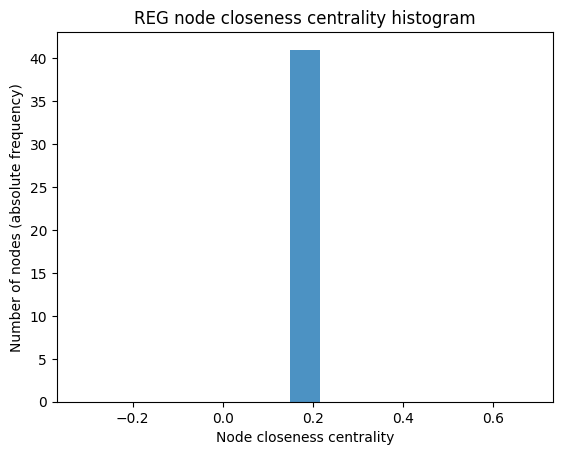

Graph: RGER
Average closeness centrality = 0.499, variance = 0.002


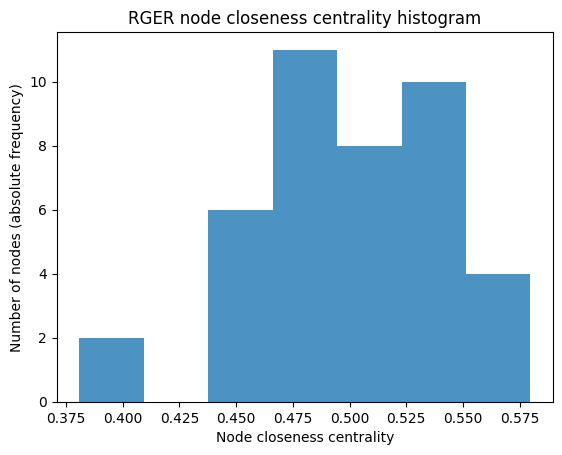

Graph: RGG
Average closeness centrality = 0.458, variance = 0.006


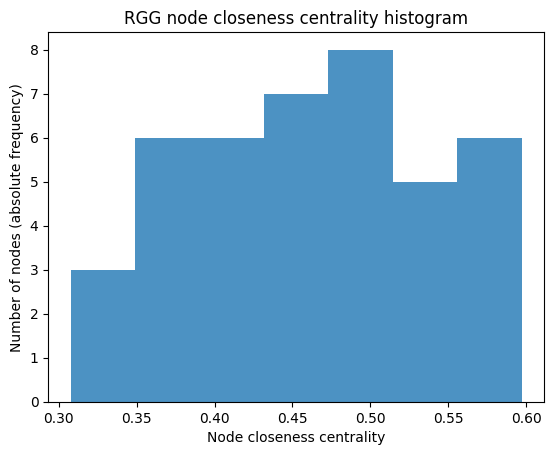

Graph: SF
Average closeness centrality = 0.506, variance = 0.003


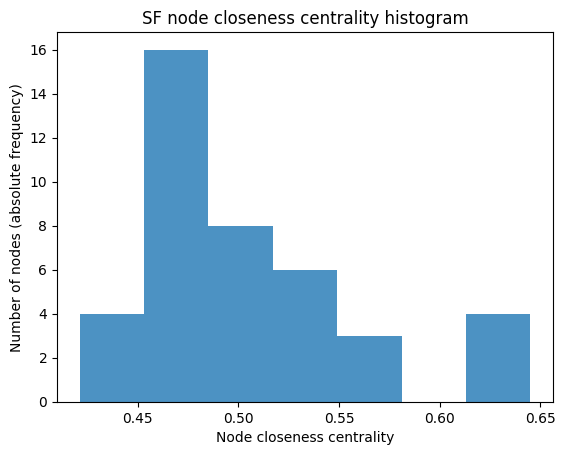

Graph: SW
Average closeness centrality = 0.348, variance = 0.001


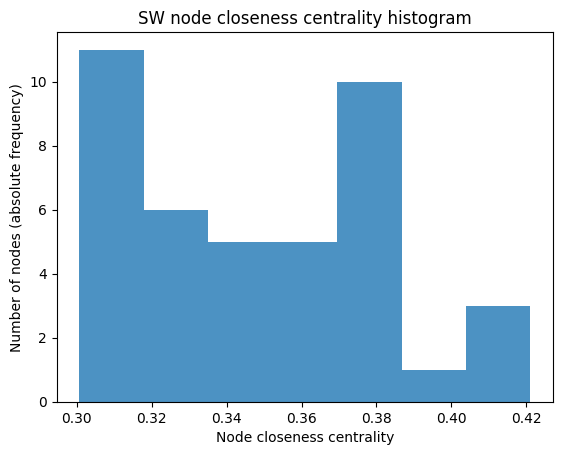

In [25]:
graphs: tuple[nx.Graph] = (REG, RGER, RGG, SF, SW)
graphs_names: list[str] = (G.graph['name'] for G in graphs)

for graph in graphs:
    plt.figure()
    if graph == REG:
        histogram_plot = find_closeness(graph, n_bins=15) # for the REG graph use 15 bins instead of automatically defining them, otherwise a single bin is used by the 'auto' option set as default value in the function
    else:
        histogram_plot = find_closeness(graph)
    plt.show()

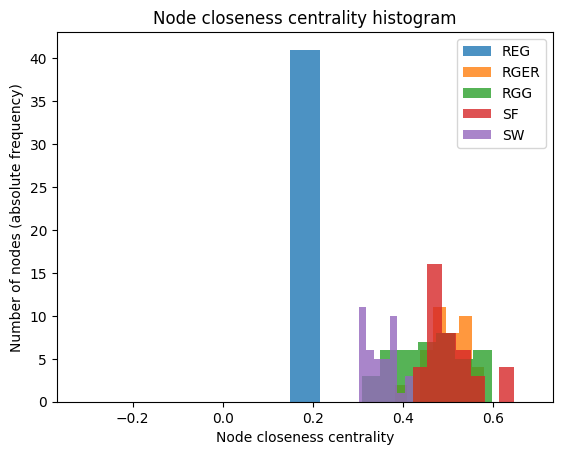

In [26]:
graphs: tuple[nx.Graph] = (REG, RGER, RGG, SF, SW)
graphs_names: list[str] = (G.graph['name'] for G in graphs)

for graph in graphs:
    if graph == REG:
        find_closeness(graph, n_bins=15, verbose=False, shared_hist=True) # for the REG graph use 15 bins instead of automatically defining them, otherwise a single bin is used by the 'auto' option set as default value in the function
    else:
        find_closeness(graph, verbose=False, shared_hist=True)
plt.legend()

The REG's nodes have constant closeness centrality equal to 0.182, wheareas all other graphs present higher values of closeness centrality on average. The highest average closeness centrality is that of the SF network which is over 0.5. RGG has the highest variance of all networks and SW has a relatively low average closeness centrality compared to other networks except REG. All variances have very low values when it comes to closeness centrality for nodes. 

### Γ3. Ενδιαμεσική κεντρικότητα (Betweenness centrality)
##### Γ3.1 Να αναπαρασταθεί η κατατανομή της ενδιαμεσικής κεντρικότητας κόμβων για κάθε τοπολογία.
##### Γ3.2 Να υπολογιστεί η μέση ενδιαμεσική κεντρικότητα καθώς και η διασπορά της για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

In [27]:
def find_betweenness(G: nx.Graph, n_bins='auto', verbose=True, hist=True, shared_hist=False):
    """
    Default mode is verbose=True, hist=True that prints information on the betweeness centrality of the graph
    and also returns them along with a histogram.
    The 2nd mode is the shared_hist=True where nothing is returned and a common histogram plot can be created.
    """
    G_name: str = G.graph['name'] # name attribute of the nx.Graph object
    n = nx.number_of_nodes(G) # nodes number

    betweenness_dict: dict = nx.betweenness_centrality(G)
    betweenness = np.array([round(item, 3) for item in betweenness_dict.values()]) # rounded otherwise REG can't be shown

    # histogram of node (local) closeness
    avg_betweenness = np.mean(betweenness)
    var_betweenness = np.var(betweenness)

    # prints
    if verbose:
        print(f"Graph: {G_name}")  # show name of graph
        print(f"Average betweenness centrality = {avg_betweenness:.3f}, variance = {var_betweenness:.5f}")

    if hist:
        plt.hist(betweenness, bins=n_bins, label=G_name, alpha=0.8) # histogram of local node betweeness. Binning strategy 'auto' is the max of 'sturges' and 'fd' estimators providing good all around performance.
        plt.title('Node betweenness centrality histogram')
        plt.xlabel("Node betweenness centrality")
        plt.ylabel("Number of nodes (absolute frequency)")
    
    if not shared_hist: # if in shared hist mode just create the shared histogram and don't return something
        plt.title(f"{G_name} node betweenness centrality histogram")
        return hist

Graph: REG
Average betweenness centrality = 0.115, variance = 0.00000


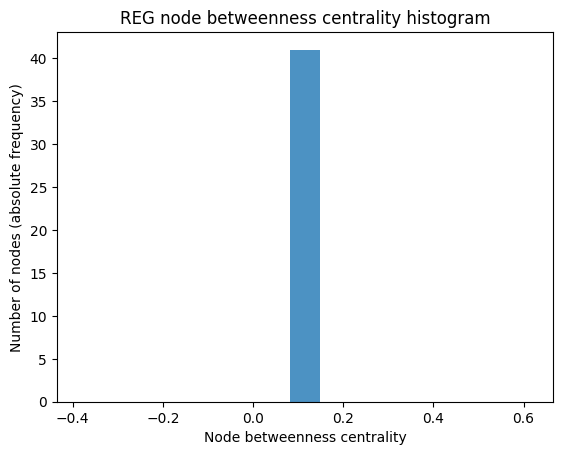

Graph: RGER
Average betweenness centrality = 0.026, variance = 0.00037


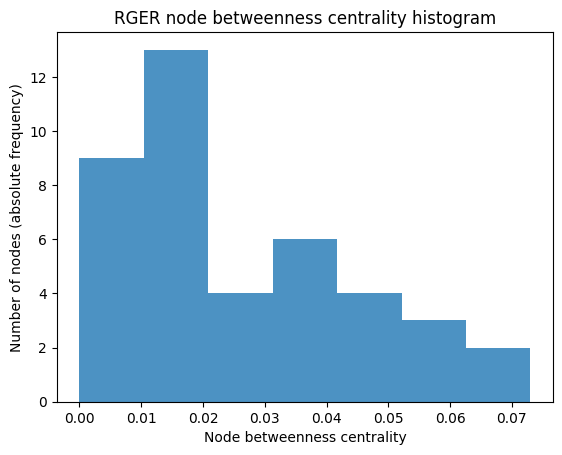

Graph: RGG
Average betweenness centrality = 0.032, variance = 0.00146


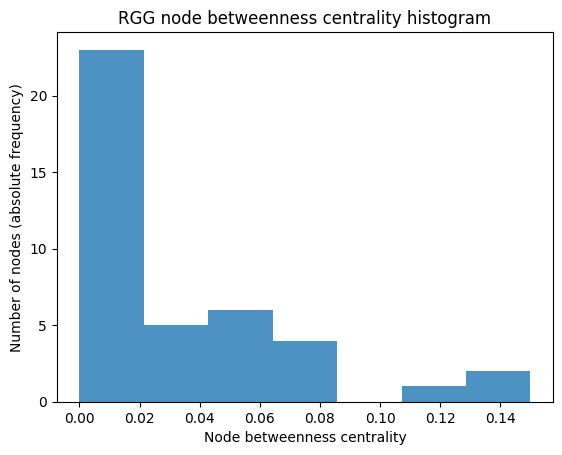

Graph: SF
Average betweenness centrality = 0.026, variance = 0.00105


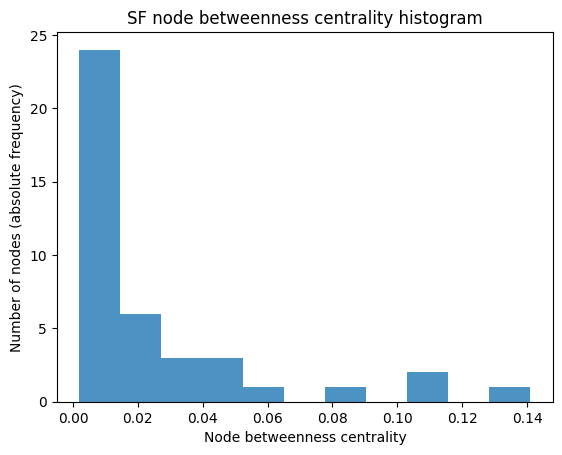

Graph: SW
Average betweenness centrality = 0.049, variance = 0.00129


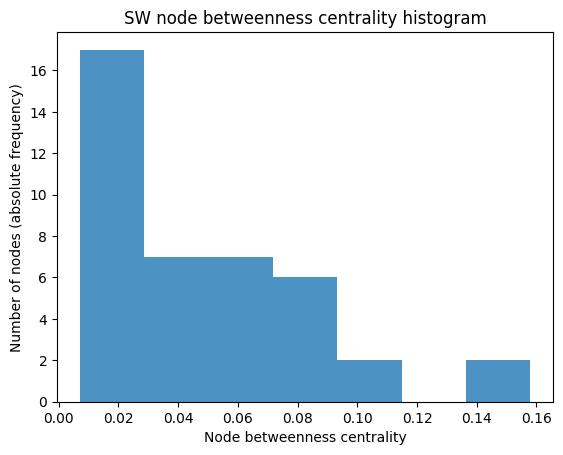

In [28]:
graphs: tuple[nx.Graph] = (REG, RGER, RGG, SF, SW)
graphs_names: list[str] = (G.graph['name'] for G in graphs)

for graph in graphs:
    plt.figure()
    if graph == REG:
        histogram_plot = find_betweenness(graph, n_bins=15) # for the REG graph use 15 bins instead of automatically defining them, otherwise a single bin is used by the 'auto' option set as default value in the function
    else:
        histogram_plot = find_betweenness(graph)
    plt.show()

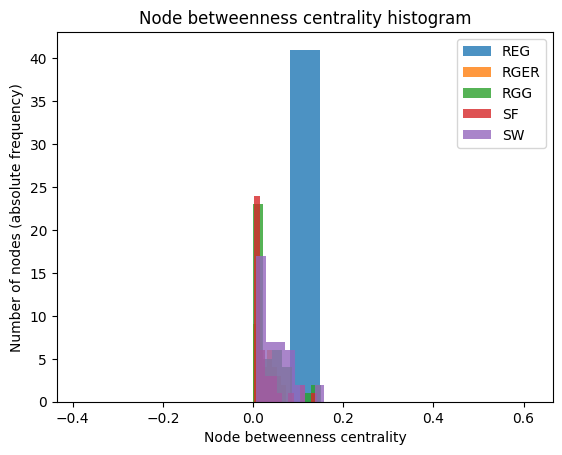

In [29]:
graphs: tuple[nx.Graph] = (REG, RGER, RGG, SF, SW)
graphs_names: list[str] = (G.graph['name'] for G in graphs)

for graph in graphs:
    if graph == REG:
        find_betweenness(graph, n_bins=15, verbose=False, shared_hist=True) # for the REG graph use 15 bins instead of automatically defining them, otherwise a single bin is used by the 'auto' option set as default value in the function
    else:
        find_betweenness(graph, verbose=False, shared_hist=True)
plt.legend()

We can see again that the REG graph has a single bin with a node betweenness centrality of 0.115 for all its nodes. RGG appears to have the highest variance whereas SW has the highest average node betweeness centrality after REG. 

### Γ4. Kεντρικότητα Katz
##### Γ4.1 Να αναπαρασταθεί η κατανομή της κεντρικότητας Katz των κόμβων για κάθε τοπολογία. 
Για τον προσδιορισμό της παραμέτρου $alpha$ της συνάρτησης katz_centrality,  να υπολογιστεί η μεγαλύτερη ιδιοτιμή $λ_{max}$ του πίνακα γειτνίασης με τη συνάρτηση adjacency_spectrum του networkx. 
H $alpha$ ορίζεται να είναι ιση με $\frac{1}{λ_{max}}-0.01$.
##### Γ4.2 Να υπολογιστεί η μέση  κεντρικότητα Katz  καθώς και η διασπορά της για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

In [31]:
import scipy 

def find_katz(G):
    max_eigenvalue = nx.adjacency_spectrum(G).real.max().round(3)

    # alternative way
    # eigenvalues = scipy.linalg.eigvals(nx.adjacency_matrix(G).todense())
    # max_eigenvalue = eigenvalues.real.max().round(3)  # lambda_max

    a = 1/max_eigenvalue - 0.01
    b = 1



find_katz(REG)

[ 4.        +0.j  3.88335363+0.j  3.88335363+0.j  3.54265151+0.j
  3.54265151+0.j  3.00478194+0.j  3.00478194+0.j  2.31189248+0.j
  2.31189248+0.j  1.51764865+0.j  1.51764865+0.j  0.68248782+0.j
  0.68248782+0.j -0.01757075+0.j -0.01757075+0.j -0.13169546+0.j
 -0.13169546+0.j -0.15505973+0.j -0.15505973+0.j -0.41396172+0.j
 -0.41396172+0.j -0.76369958+0.j -0.76369958+0.j -0.8669446 +0.j
 -0.8669446 +0.j -1.16219614+0.j -1.16219614+0.j -1.47422268+0.j
 -1.47422268+0.j -1.56001825+0.j -1.56001825+0.j -2.24910222+0.j
 -2.24910222+0.j -2.14878867+0.j -2.1767577 +0.j -2.1767577 +0.j
 -2.14878867+0.j -1.90527237+0.j -1.90527237+0.j -1.91752613+0.j
 -1.91752613+0.j]
4.0
[ 4.        +0.j  3.88335363+0.j  3.88335363+0.j  3.54265151+0.j
  3.54265151+0.j  3.00478194+0.j  3.00478194+0.j  2.31189248+0.j
  2.31189248+0.j  1.51764865+0.j  1.51764865+0.j  0.68248782+0.j
  0.68248782+0.j -0.01757075+0.j -0.01757075+0.j -0.13169546+0.j
 -0.13169546+0.j -0.15505973+0.j -0.15505973+0.j -0.41396172+0.j
 -0

C:\Users\User\AppData\Local\Temp\ipykernel_14116\767636597.py:6: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  eigenvalues = scipy.linalg.eigvals(nx.adjacency_matrix(G).todense())
c:\Users\User\Downloads\DSML MsC\1st semester\Ανάλυση Κοινωνικών Δικτύων - Social Networks\Εργαστηριακές Ασκήσεις\2022\Social-Networks-Analysis\venv\lib\site-packages\networkx\linalg\spectrum.py:110: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return sp.linalg.eigvals(nx.adjacency_matrix(G, weight=weight).todense())


In [17]:
def find_katz(G):
    pass

#### Να προσδιοριστούν, για κάθε τοπολογία, οι πιο κεντρικοί κόμβοι ως προς το βαθμό, την εγγύτητα, την ενδιαμεσική κεντρικότητα και την κεντρικότητα Katz. Να σχολιαστούν τα αποτελέσματα.

In [18]:
def find_central(G):
    pass

### Γ5. Αλγόριθμος PageRank σε πραγματικό δίκτυο
#####  Να εκτελεστεί ο αλγόριθμος pagerank στην 41η μεγαλύτερη συνδεδεμένη συνιστώσα (index=40) του κατευθυνόμενου δίκτυου web-Stanford του οποίου οι ακμές δίνονται στο αρχείο web-Standord.txt. 
##### Για να υπολογίσετε τις συνδεδεμένες συνιστώσες, χρησιμοποιήστε τη συνάρτηση weakly_connected_components του networkx.
Περισσότερες πληροφορίες για το dataset δίνονται στο link https://snap.stanford.edu/data/web-Stanford.html.
##### Να σχολιαστούν τα αποτελέσματα.

In [19]:
#uncomment G_web=nx.read_edgelist("web-Stanford.txt",create_using=nx.DiGraph())

In [20]:
#find the 40th largest weakly connected component of the graph web-Stanford
#G40 = 

In [21]:
#pagerank

### Δ) Μελέτη συνεκτικότητας και ευρωστία (robustness) δικτύων 

### Δ1. Μελέτη συνεκτικότητας
Για κάθε τύπο σύνθετου δικτύου, ορίζεται το ποσοστό συνεκτικότητας για έναν αριθμό παραγόμενων τοπολογιών, ως κλάσμα των συνδεδεμένων τοπολογιών σε σχέση με τον αριθμό όλων των παραγόμενων τοπολογιών.

Με βάση τις τιμές παραμέτρων του Πίνακα 2, μελετήστε τη συνεκτικότητα κάθε τύπου σύνθετου δικτύου του Πίνακα 1.

<table>
    <thead>
        <tr>
            <th>Τοπολογία</th>
            <th>Εύρος Παραμέτρων</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td >REG</td>
            <td rowspan=6>$n = \{100, 200\}$</td>
            <td>$d \in [2,10]$ με βήμα $2$</td>
        </tr>
        <tr>
            <td>RGER</td>
            <td>$M \in [100,800]$ με βήμα $100$</td>
        </tr>
        <tr>
            <td>RG-Gilbert</td>
            <td>$p \in [0.01,0.1]$ με βήμα $0.01$</td>
        </tr>
        <tr>
            <td>RGG</td>
            <td>$R \in [0.025,0.25]$ με βήμα $0.025$</td>
        </tr>
        <tr>
            <td>SF</td>
            <td>$d \in [2,10]$ με βήμα $2$</td>
        </tr>
        <tr>
            <td>SW</td>
            <td>$d \in [2,10]$ με βήμα $2$ και $g_p \in [0.1,0.7]$ με βήμα $0.1$</td>
        </tr>
    </tbody>
    <caption>Πίνακας 2</caption>
</table>

#### Δ1.1 Για κάθε έναν τύπο δικτύου, να παράξετε 100 διαφορετικές τοπολογίες και να παρουσιάσετε το διάγραμμα ποσοστού συνεκτικότητας σε σχέση με τις καθορισμένες παραμέτρους κάθε δικτύου.
#### Δ1.2 Σε ποιες περιπτώσεις εμφανίζονται φαινόμενα κατωφλίου;
#### Δ1.3 Ποιες είναι οι κρίσιμες τιμές για κάθε τύπο δικτύου οι οποίες οδηγούν σε μετάβαση φάσης (phase transitions);
#### Δ1.4 Ποιες μεταβάσεις φάσης είναι απότομες (sharp) και ποιες ομαλές (smooth);

In [22]:
print("Connectivity REG")

Connectivity REG


In [23]:
print("Connectivity RG Erdos-Renyi")

Connectivity RG Erdos-Renyi


In [24]:
print("Connectivity RG Gilbert")

Connectivity RG Gilbert


In [25]:
print("Connectivity RGG")

Connectivity RGG


In [26]:
print("Connectivity SF")

Connectivity SF


In [27]:
print("Connectivity SW") 

Connectivity SW


### Δ2. Μελέτη ευρωστίας δικτύου

#### Για κάθε μια από τις τοπολογίες REG, RG(ER), RGG, SF(BA) και SW(WS) που εξετάστηκαν στις ενότητες Β και Γ, να υπολογιστεί με τη συνάρτηση minimum_node_cut ο ελάχιστος αριθμός κόμβων που πρέπει να αφαιρεθούν για να προκύψει μη συνδεδεμένο δίκτυο. 
#### Να σχολιαστούν τα αποτελέσματα.

In [28]:
def find_cut(G):
    pass

### E) Μελέτη της εξελικτικής μετατροπής δικτύου REG σε δίκτυο SW και RGER

##### Μεταβάλλοντας την παράμετρο $g_p$ από $0$ έως $1$ με βήμα $0.1$της συνάρτησης που κατασκευάζει τοπολογίες SW μεγέθους $n=30x$ ( αντικαταστήστε το x με το τελευταίο ψηφίο του ΑΜ) με βαθμό αρχικού πλέγματος $d=4$, να βρείτε το μέσο μήκος μονοπατιού και το μέσο συντελεστή ομαδοποίησης. Πώς συμπεριφέρεται το παραγόμενο δίκτυο για $g_p = 0$, πώς για $g_p = 1$ και πώς για ενδιάμεσες τιμές $g_p \simeq 0.1 - 0.5$;

In [29]:
random.seed(seedno)
#n=30x
d=4

### Z) Αναγνώριση τύπου πραγματικού δικτύου 
##### Για το πραγματικό δίκτυο που δίνεται στο αρχείο got.txt  και αφορά στις αλληλεπιδράσεις των χαρακτήρων του Game of Thrones στον πρώτο κύκλο επεισοδίων (https://github.com/mathbeveridge/gameofthrones) να βρεθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης και ο μέσος συντελεστής ομαδοποίησης.</li>
    <li>Το μέσο μήκος μονοπατιού.</li>
</ol>
<p style=text-align:justify>Να οπτικοποιηθεί το δίκτυο. Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο της τοπολογίας με βάση τους τύπους δικτύων που εξετάστηκαν στις ενότητες B, Γ.</p>

In [30]:
#read csv
import csv
G_got=nx.Graph() #the graph of the GOT characters
with open('got.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
            G_got.add_edge(row[0],row[1],weight=row[2])
            line_count += 1

#### Ποιοι ήταν οι 5 κεντρικότεροι χαρακτήρες του πρώτου κύκλου επεισοδίων ως προς το βαθμό, την εγγύτητα και την ενδιαμεσικότητα ? 